## 1. Clustering Q1 (EastWestAirlines)
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

## 1. Import Libs

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## 2. Import DataSet

In [2]:
from google.colab import files
upload = files.upload()


Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
df = pd.read_excel("EastWestAirlines.xlsx")
df1 = df.copy()
df1

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


## EastWestAirlines_Clean --> It is an cleaned data set

In [8]:
Airline_data = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
airline_data_1 = Airline_data.copy()
airline_data_1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## 3. EDA

In [9]:
airline_data_1.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
airline_data_1.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

## Droping ID# column

In [20]:
airline_data_1.drop(['ID#'],axis=1,inplace= True) 

## 4. Preprocessing the Data || Normalizing Data

In [11]:
airline_norm = preprocessing.scale(airline_data_1)
airline_norm = pd.DataFrame(airline_norm)  #standardize the data to normal distribution
airline_norm

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


## 5. Clustering
## 5.1 Hirarchical Clustering
## 5.1.1 Create Dendogram

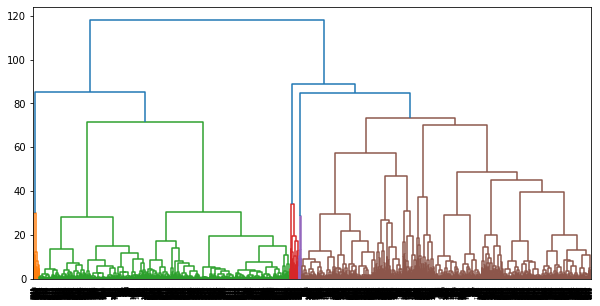

In [21]:
plt.figure(figsize=(10, 5)) 
dendgram = sch.dendrogram(sch.linkage(airline_norm,method='ward'))

## 5.1.2 Create Cluster

In [22]:
h_cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
h_cluster

AgglomerativeClustering(n_clusters=5)

In [23]:
y=pd.DataFrame(h_cluster.fit_predict(airline_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    2075
1    1800
2      63
3      43
4      18
Name: clustersid, dtype: int64

In [24]:
h_cluster.labels_

array([1, 1, 1, ..., 0, 1, 1])

## 5.1.3 Adding clusters to dataset

In [25]:
airline_data_1['clustersid']=h_cluster.labels_
airline_data_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


## 5.1.4 Grouping

In [26]:
airline_data_1.groupby('clustersid').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clustersid,,,,,,,,,,,
0,101276.799518,251.093494,2.813012,1.000000,1.000000,27421.138313,15.320482,524.836627,1.575422,4703.515663,0.674699
1,38220.721111,9.431667,1.183889,1.000000,1.000000,3770.797222,6.238333,113.728333,0.383889,3429.802778,0.000000
2,160067.206349,573.587302,2.507937,1.000000,1.000000,42723.841270,34.142857,8148.619048,22.444444,4527.253968,0.873016
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000


## 5.1.5 Plot Clusters

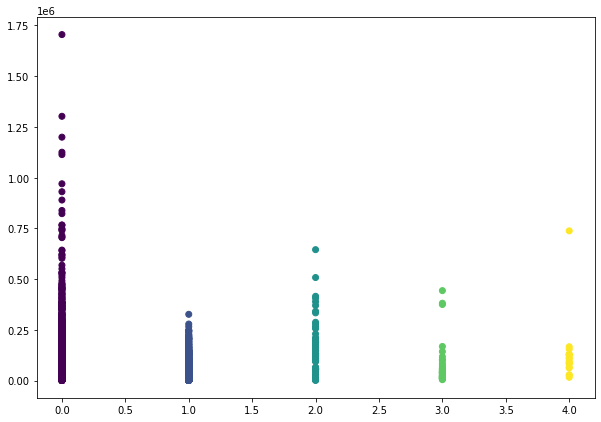

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data_1['clustersid'],airline_data_1['Balance'], c=h_cluster.labels_)

## 5.1.6 Data Filtering

In [28]:
airline_data_1[airline_data_1['clustersid'] == 0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
10,40091,0,2,1,1,7278,10,0,0,6959,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0


In [29]:
airline_data_1[airline_data_1['clustersid'] == 1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [30]:
airline_data_1[airline_data_1['clustersid'] == 2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
65,53914,0,3,1,1,33767,45,5550,29,6826,1,2
135,259484,1776,1,1,1,19172,26,7172,23,6723,1,2
238,30962,0,5,1,1,97683,37,6400,18,7360,1,2
323,278727,0,1,1,1,21666,19,9166,16,7155,1,2
327,388455,0,5,1,1,114329,26,6078,8,7164,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3463,119214,0,1,1,1,19633,23,15533,17,1041,1,2
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,2
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,2
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,2


In [31]:
airline_data_1[airline_data_1['clustersid'] == 3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
8,443003,0,3,2,1,1753,43,3850,12,6948,1,3
198,8669,0,1,3,1,11397,16,0,0,7486,1,3
226,117329,0,1,2,1,6448,11,0,0,7416,1,3
381,167670,0,1,3,1,15907,13,0,0,6994,0,3
392,11189,0,1,2,1,9044,20,0,0,8296,1,3
561,380930,0,2,2,1,22485,25,213,1,6539,1,3
794,55610,0,1,2,1,5095,13,0,0,6151,0,3
940,44824,0,1,3,1,21107,19,2000,4,5916,1,3
1149,84856,0,1,2,1,6894,13,0,0,5547,0,3
1270,16103,0,1,3,1,10819,13,0,0,5427,0,3


In [32]:
airline_data_1[airline_data_1['clustersid'] == 4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
343,112501,0,1,1,2,19140,11,0,0,7101,0,4
384,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,15835,0,2,1,5,112171,16,0,0,5825,1,4
1036,154664,0,4,1,3,73881,33,0,0,5769,0,4
1244,166465,0,4,1,4,98717,30,0,0,5531,0,4
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,4


## 5.2 K-Means Clustering
## 5.2.1 Use Elbow Graph to find optimum number of clusters (K value) from K values range

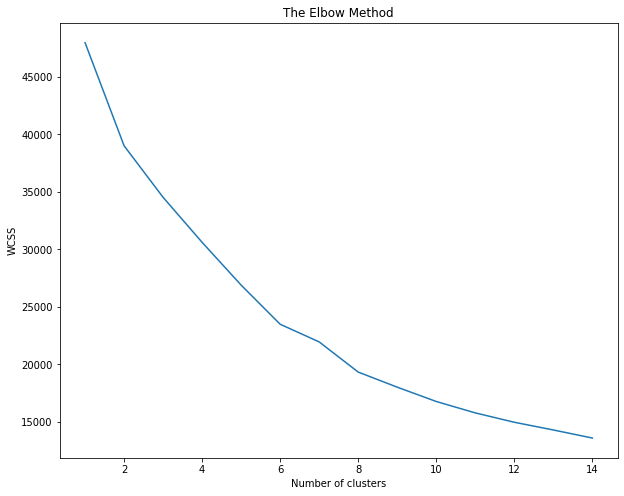

In [33]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(airline_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 5.2.2 Create Cluster

In [34]:
km_clusters=KMeans(4,random_state=20).fit(airline_norm)
km_clusters

KMeans(n_clusters=4, random_state=20)

In [35]:
km_clusters.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

## 5.2.3 Adding clusters to dataset

In [36]:
airline_data_2=Airline_data.drop(['ID#'],axis=1)
airline_data_2['clusters_id_2']=km_clusters.labels_
airline_data_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_id_2
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


## 5.2.4 Compute Centroid

In [37]:
km_clusters.cluster_centers_

array([[ 0.96605697, -0.33512396, -0.05849564, -0.49079663,  0.01671492,
        -0.06276658, -0.45187981, -0.39521673, -0.18439239, -0.20383146,
        -0.95354714, -0.33166495],
       [-0.22708278,  1.20284695,  0.8613124 ,  0.10111012,  0.16228153,
        -0.06276658,  0.63485991,  1.68030149,  3.607528  ,  3.91562026,
         0.27255539,  0.93222938],
       [-0.79121808, -0.16403019, -0.04371615, -0.50677286,  0.02690562,
        -0.05882315, -0.46570541, -0.37573735, -0.16484116, -0.17603979,
         0.77067969, -0.2408405 ],
       [-0.41184   ,  0.53245157,  0.01189512,  1.37789053, -0.08485531,
         0.18019887,  1.18398523,  0.821569  , -0.06537209, -0.06906253,
         0.4122556 ,  0.66752443]])

## 5.2.5 Grouping

In [38]:
airline_data_2.groupby('clusters_id_2').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_id_2,,,,,,,,,,,
0,39833.210836,98.864230,1.383812,1.016971,1.000000,6232.875979,7.806789,201.900131,0.600522,2149.602480,0.210183
1,194803.871795,810.397436,2.198718,1.038462,1.000000,32475.410256,27.737179,5510.717949,16.224359,4681.352564,0.820513
2,57073.143187,110.297152,1.361817,1.018476,1.000770,5899.016166,7.993841,229.272517,0.705928,5709.917629,0.254042
3,127252.779644,153.316206,3.956522,1.001976,1.047431,45735.660079,19.491107,368.532609,1.111660,4969.816206,0.692688


## 5.2.6 Plot Clusters

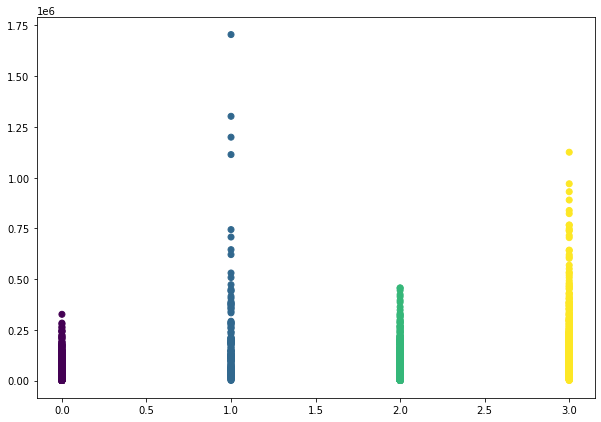

In [39]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data_2['clusters_id_2'],airline_data_2['Balance'], c=km_clusters.labels_) 

## 5.2.7 Data Filtering

In [40]:
airline_data_2[airline_data_2['clusters_id_2'] == 0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_id_2
1129,1625,0,1,1,1,1375,4,0,0,1547,0,0
1424,22093,0,3,1,1,14857,11,200,1,2587,0,0
1950,15676,0,1,1,1,0,0,0,0,3178,0,0
1951,55064,0,2,1,1,8041,13,0,0,3329,1,0
1952,40675,0,1,1,1,1413,9,0,0,2895,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [41]:
airline_data_2[airline_data_2['clusters_id_2'] == 1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_id_2
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
42,60313,0,1,1,1,10000,26,3250,9,7829,1,1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,1
94,185549,0,5,1,1,110859,39,2950,16,6778,1,1
112,124198,0,5,1,1,66330,23,4833,10,7710,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,1


In [42]:
airline_data_2[airline_data_2['clusters_id_2'] == 3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_id_2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
6,84914,0,3,1,1,27482,25,0,0,6994,0,3
9,104860,0,3,1,1,28426,28,1150,3,6931,1,3
11,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,28495,0,4,1,1,49442,15,0,0,6912,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,126167,0,5,1,1,190160,15,0,0,1612,1,3
3897,179832,2954,3,1,1,18218,20,2500,5,1569,1,3
3908,57642,0,4,1,1,52176,15,0,0,1564,1,3


## 5.3 DBSCAN Clustering
## 5.3.1 Create DBSCAN Clustering

In [43]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline_norm)

DBSCAN(eps=1, min_samples=4)

In [44]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

## 5.3.2 Adding clusters to dataset

In [45]:
airline_data_3=Airline_data.drop(['ID#'],axis=1)
airline_data_3['db_clusters']=dbscan.labels_
airline_data_3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


## 5.3.3 Grouping

In [46]:
airline_data_3.groupby('db_clusters').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
db_clusters,,,,,,,,,,,
-1,177646.939292,899.406408,2.701518,1.062395,1.082631,39019.816189,21.784148,2120.370995,6.134907,4652.507589,0.686341
0,53148.905529,2.084023,1.660427,1.000000,1.000000,9033.232477,8.449717,116.498041,0.380932,3811.440139,0.000000
1,61006.745987,5.796034,2.605288,1.000000,1.000000,22850.425873,12.799811,245.526912,0.761095,4513.312559,1.000000
2,35251.500000,1058.750000,1.000000,1.000000,1.000000,1297.500000,1.250000,0.000000,0.000000,5047.250000,0.000000
3,65419.714286,0.000000,1.000000,1.000000,1.000000,6984.000000,11.571429,2905.571429,9.142857,5171.857143,1.000000
4,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
5,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
6,32730.750000,0.000000,1.000000,3.000000,1.000000,14267.750000,13.250000,62.500000,0.250000,4396.500000,0.000000


## 5.3.4 Plot Clusters

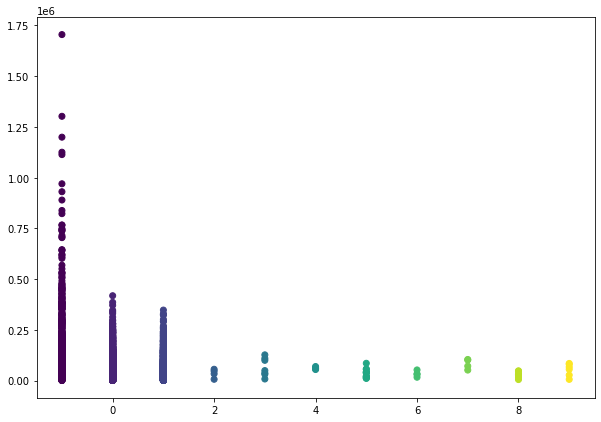

In [47]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data_3['db_clusters'],airline_data_3['Balance'], c=dbscan.labels_) 

## 5.3.5 Data Filtering

In [48]:
airline_data_3[airline_data_3['db_clusters'] == -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,205651,500,1,1,1,4025,21,700,4,7932,0,-1
32,276571,0,4,1,1,42044,23,0,0,7872,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,-1
3950,59650,0,1,1,1,5050,16,3950,13,1476,0,-1
3956,47301,1005,1,1,1,4561,4,0,0,1464,0,-1
3961,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [49]:
airline_data_3[airline_data_3['db_clusters'] == 0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [50]:
airline_data_3[airline_data_3['db_clusters'] == 2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
1243,55384,967,1,1,1,0,0,0,0,5309,0,2
1343,33057,763,1,1,1,5190,5,0,0,4828,0,2
1359,46545,1000,1,1,1,0,0,0,0,5066,0,2
1532,6020,1505,1,1,1,0,0,0,0,4986,0,2


In [51]:
airline_data_3[airline_data_3['db_clusters'] == 3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
706,30530,0,1,1,1,5590,12,2950,9,6298,1,3
1146,7383,0,1,1,1,7225,11,2750,7,5238,1,3
1240,99405,0,1,1,1,14150,11,2150,9,5400,1,3
1292,36290,0,1,1,1,8600,13,2600,9,5111,1,3
1404,108950,0,1,1,1,3300,9,3300,9,5259,1,3
1520,126484,0,1,1,1,5942,13,3192,11,4758,1,3
1868,48896,0,1,1,1,4081,12,3397,10,4139,1,3


In [52]:
airline_data_3[airline_data_3['db_clusters'] == 4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
1052,62183,1896,4,1,1,38635,18,0,0,5738,1,4
1420,68891,1697,4,1,1,37257,14,500,1,5178,1,4
1425,58538,1739,4,1,1,48670,19,500,2,4352,1,4
1501,54116,1846,3,1,1,34997,14,0,0,4848,1,4


In [53]:
airline_data_3[airline_data_3['db_clusters'] == 5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
794,55610,0,1,2,1,5095,13,0,0,6151,0,5
1149,84856,0,1,2,1,6894,13,0,0,5547,0,5
1541,36887,0,1,2,1,9048,11,0,0,4951,0,5
1976,11961,0,1,2,1,11961,10,0,0,4646,0,5
2317,10458,0,1,2,1,10458,12,0,0,3726,0,5
2421,41062,0,1,2,1,8275,11,0,0,3356,0,5
2741,42970,0,1,2,1,7889,14,0,0,2256,0,5
2906,17769,0,1,2,1,5165,10,0,0,1807,0,5
3155,21736,0,1,2,1,6672,10,0,0,2544,0,5
3191,56624,0,1,2,1,12311,14,0,0,2491,0,5


In [54]:
airline_data_3[airline_data_3['db_clusters'] == 6]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
1270,16103,0,1,3,1,10819,13,0,0,5427,0,6
1791,32510,0,1,3,1,14568,13,0,0,4341,0,6
1918,52139,0,1,3,1,16314,14,250,1,3965,0,6
2278,30171,0,1,3,1,15370,13,0,0,3853,0,6


In [55]:
airline_data_3[airline_data_3['db_clusters'] == 7]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusters
2218,101057,0,1,1,1,13650,11,2150,9,3600,1,7
2541,103615,0,1,1,1,13668,15,1300,11,2896,1,7
2620,51353,0,1,1,1,8114,16,2004,10,2637,1,7
3230,70927,0,1,1,1,12011,12,1567,8,2096,1,7


## END